In [ ]:
#데이터 준비
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
#2차원 배열을 1차원 배열로 펼치는 과정                     1
import numpy as np
from sklearn.model_selection import train_test_split
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42)


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# 시그모이드 층 만들어 보자
# 첫번째가 은닉 층
#은닉층에 입력의 크기(100)는 기준이 없다. 자유
#출력층보다는 많게 만들어야함 
dense1 = keras.layers.Dense(100,  activation = 'sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10,  activation = 'softmax')

In [ ]:
#심층 신경망 만들기
model = keras.Sequential([dense1, dense2])

In [ ]:
#모델 훈련하자
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7579 - accuracy: 0.7584
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4191 - accuracy: 0.8502
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3763 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3533 - accuracy: 0.8712
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.8789


In [ ]:
#손실함수 그래프

#데이터 준비
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
#2차원 배열을 1차원 배열로 펼치는 과정                     1
import numpy as np
from sklearn.model_selection import train_test_split
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42)


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#모델 만들자 
def model_fn(a_layer =None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer) #함수에 케라스 층을 추가하면 또 하나의 층을 추가하는 것
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit 결과를 history 변수에 담아보자
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs =5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


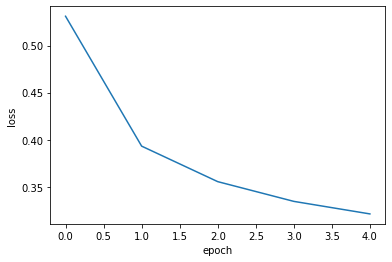

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

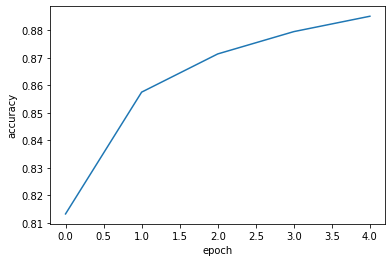

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

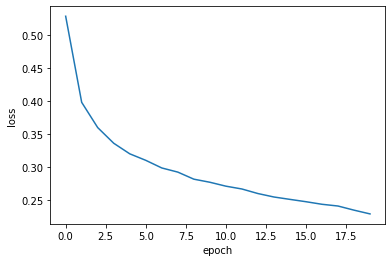

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs =20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 검증 손실/

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0,validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


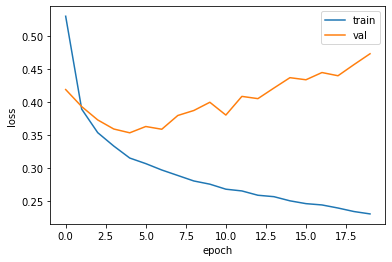

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

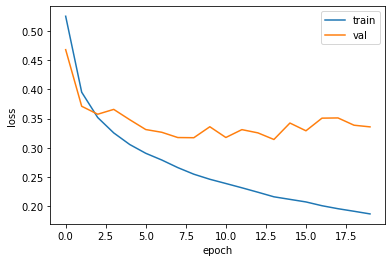

In [ ]:
#adam
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20,verbose =0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 드랍아웃

In [ ]:
model = model_fn(keras.layers.Dropout(0,3))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# #adam, dropout
# model = model_fn(keras.layers.Dropout(0,3))
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
# history = model.fit(train_scaled, train_target, epochs = 20,verbose =0,
#                     validation_data=(val_scaled, val_target))

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.legend(['train', 'val'])
# plt.show()

In [ ]:
# 모델 저장
# model = model_fn(keras.layers.Dropout(0,3))
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
# history = model.fit(train_scaled, train_target, epochs = 20,verbose =0,
#                     validation_data=(val_scaled, val_target))
#이 모델을 저장하려면

model.save_weights('model-weights.h5')


In [ ]:
#모델 구조와 파라미터를 함께 저장하는 save메서드
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Feb  2 08:02 model-weights.h5
-rw-r--r-- 1 root root 333880 Feb  2 08:02 model-whole.h5


In [33]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h.5')
#체크포인트만들자
model.fit(train_scaled, train_target, epochs = 20,verbose =0,
                    validation_data=(val_scaled, val_target),
callbacks =[checkpoint_cb])

INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written to: best-model.h.5/assets
INFO:tensorflow:Assets written 

In [ ]:
#조기종료
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
#체크포인트만들자
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h.5')

#조기종료 칸 -> 에포크를 알아서 멈춰줌
early_stopping_cb = keras.callbacks.EarlyStopping(patience= 2, 
                                                  restore_best_weights =True)

model.fit(train_scaled, train_target, epochs = 20,verbose =0,
                    validation_data=(val_scaled, val_target),
callbacks =[checkpoint_cb, early_stopping_cb])